#

In [30]:
#Step 1: Imports
#import relevant libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 #load dataset
companies = pd.read_csv("c:\\Road To data Science\\Datasets\\Unicorn_Companies.csv")

#Step 2: Data exploration
## Display the first 10 rows of the data.
companies.head(10)


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [31]:
#identify the number of rows and columns in the dataset
companies.shape

#check for duplicates
companies.duplicated().sum()

#overview of data
companies.info()

#rename columns
companies = companies.rename(columns ={'Date Joined':'date_joined',
                                       'Year Founded':'year_founded',
                                       'Select Investors':'select_investors'})

#check for updated column names
print(companies.columns)

companies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB
Index(['Company', 'Valuation', 'date_joined', 'Industry', 'City', 'Country',
       'Continent', 'year_founded', 'Funding', 'select_investors'],
      dtype='object')


,Company,Valuation,date_joined,Industry,City,Country,Continent,year_founded,Funding,select_investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


Text(0.5, 1.0, 'Year Founded histogram')

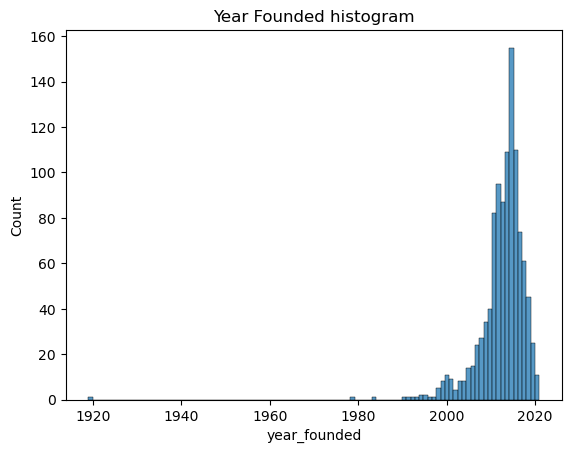

In [32]:
#display the data types of the column
companies.dtypes

# Sort `companies` and display the first 10 rows of the resulting DataFrame.
companies.sort_values(by = 'year_founded',ascending = False).head(10)

# Display each unique year that occurs in the dataset
# along with the number of companies that were founded in each unique year.

companies['year_founded'].value_counts().sort_values(ascending=False)

# Plot a histogram of the Year Founded feature.
sns.histplot(data = companies,x='year_founded')
plt.title("Year Founded histogram")

In [33]:
#Convert the 'date_joined' column to Date time
companies['date_joined'] = pd.to_datetime(companies['date_joined'])

companies.dtypes


#create a month joined column
companies["month_joined"] = companies['date_joined'].dt.month_name()

#create a years_to_join column
companies["years_to_join"] = companies['date_joined'].dt.year - companies['year_founded']

companies_2021 = companies[companies['date_joined'].dt.year == 2021]
companies_2021.head()


,Company,Valuation,date_joined,Industry,City,Country,Continent,year_founded,Funding,select_investors,month_joined,years_to_join
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",July,3
16,J&T Express,$20B,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",April,6
24,Blockchain.com,$14B,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",February,10
27,OpenSea,$13B,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",July,4
34,Getir,$12B,2021-03-26,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",March,6


In [34]:


# Insert a 'week_joined' column into `companies_2021`, using ISO week format
companies_2021.insert(3, "week_joined", companies_2021["date_joined"].dt.strftime('%Y-W%V'), True)

# Group `companies_2021` by `week_joined`, aggregate by counting companies per week
companies_by_week_2021 = companies_2021.groupby("week_joined")["Company"].count().reset_index().rename(columns={'Company':'company_count'})

# Display the first few rows of the new DataFrame
print(companies_by_week_2021.head(10))



  week_joined  company_count
0    2021-W01             12
1    2021-W02              9
2    2021-W03              5
3    2021-W04              8
4    2021-W05              4
5    2021-W06              3
6    2021-W07              9
7    2021-W08              6
8    2021-W09              8
9    2021-W10              7


In [38]:
# Filter by the additional year to create a subset that consists of companies that joined in that year.
companies_2020 = companies[companies["date_joined"].dt.year == 2020]

# Concatenate the new subset with the subset that you defined previously.
companies_2020_2021 = pd.concat([companies_2020,companies_2021.drop(columns="week_joined")])

# Add `Quarter Joined` column to `companies_2021`.
companies_2020_2021["quarter_joined"] = companies_2020_2021["date_joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')

# Convert the `Valuation` column to numeric by removing `$` and `B` and casting each value to data type `float`
companies_2020_2021["Valuation"] = companies_2020_2021["Valuation"].str.strip('$B').astype(float)

# Group `companies_2020_2021` by `Quarter Joined`, 
# Aggregate by computing average `Funding` of companies that joined per quarter of each year.
# Save the resulting DataFrame in a new variable.
companies_by_quarter_2020_2021 = companies_2020_2021.groupby(by="quarter_joined")["Valuation"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})

# Display the first few rows of the new DataFrame to confirm that it was created.
companies_by_quarter_2020_2021.head()


,quarter_joined,Average Valuation
0,2020-Q1,3.444444
1,2020-Q2,3.777778
2,2020-Q3,3.896552
3,2020-Q4,3.697674
4,2021-Q1,2.750000


In [39]:
#Step 3: Time-to-unicorn visualization
#Visualize the time it took companies to become unicorns

# Define a list that contains months in chronological order.
month_order = ["January","February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", 
               "December"]

# Print out the list to confirm it is correct.
print(month_order)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


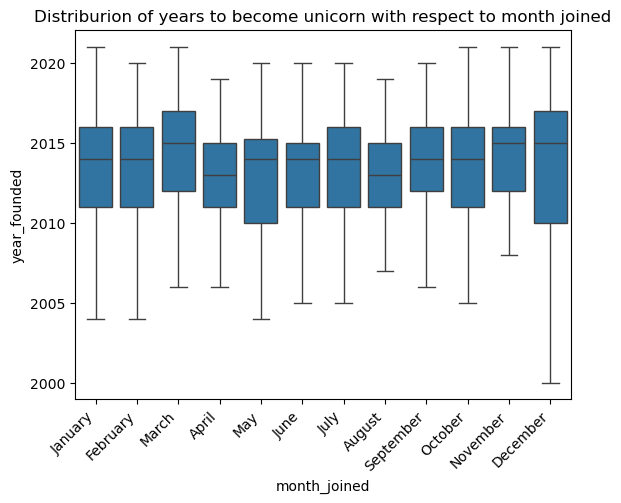

In [41]:
# Create the box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined.
# Make sure the x-axis goes in chronological order by month, using the list you defined previously.
# Plot the data from the `companies` DataFrame.

sns.boxplot(x=companies['month_joined'],
            y=companies['year_founded'],
            order = month_order,
            showfliers = False)
# Set the title of the plot.
plt.title('Distriburion of years to become unicorn with respect to month joined')
# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text. 
plt.xticks(rotation=45,horizontalalignment = 'right')
# Display the plot.
plt.show()




C:\Users\DELL\AppData\Local\Temp\ipykernel_6148\3829612939.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x=companies["year_founded"],y=companies["years_to_join"],ci=


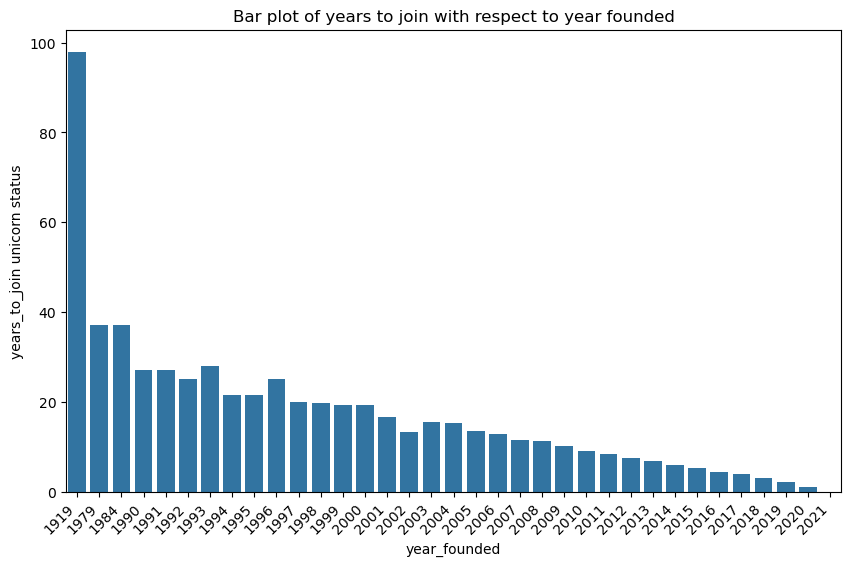

In [42]:
#Step 4: Results and evaluation

#set the size of the plot
plt.figure(figsize=(10,6))

# Create bar plot to visualize the average number of years it took companies to reach unicorn status 
# with respect to when they were founded.
# Plot data from the `companies` DataFrame
sns.barplot(x=companies["year_founded"],y=companies["years_to_join"],ci=
            False)

#set tite
plt.title("Bar plot of years to join with respect to year founded")

#set xlabel
plt.xlabel("year_founded")
#set ylabel
plt.ylabel("years_to_join unicorn status")
# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.  
plt.xticks(rotation = 45,horizontalalignment = 'right')
#display the plot
plt.show()

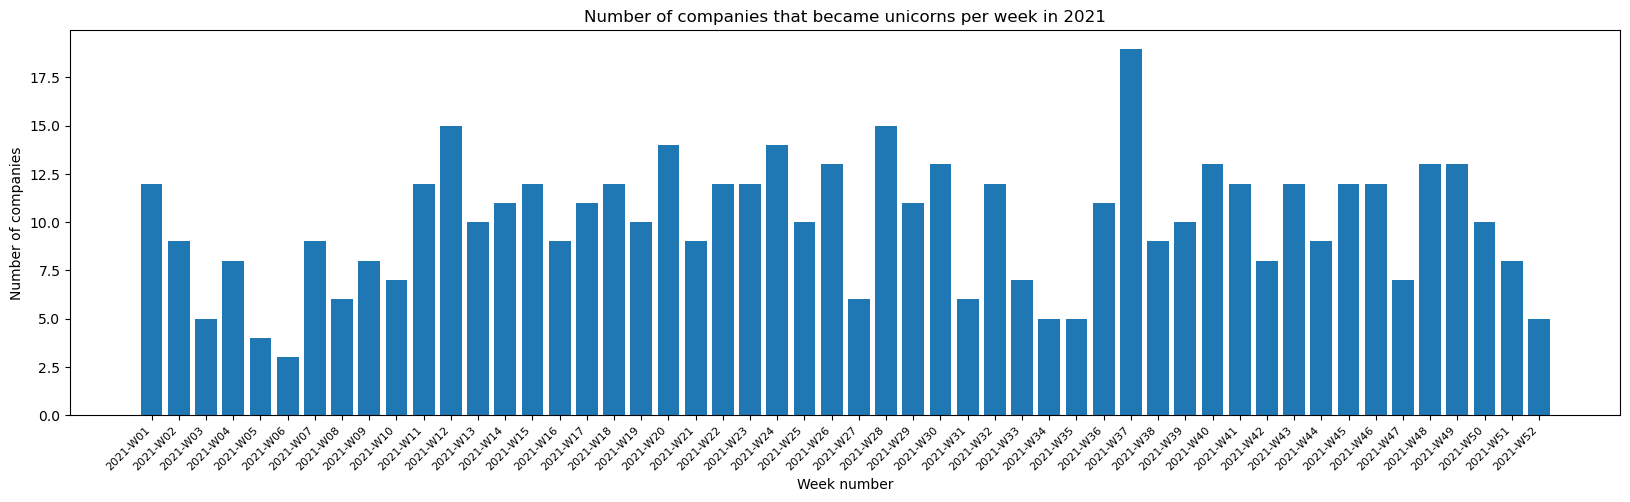

In [44]:
# Set the size of the plot.
plt.figure(figsize = (20, 5))

# Create bar plot to visualize number of companies that joined per interval for the year of interest.
plt.bar(x=companies_by_week_2021['week_joined'],height=companies_by_week_2021['company_count'])
plt.plot()

# Set the x-axis label.
plt.xlabel("Week number")

# Set the y-axis label.
plt.ylabel("Number of companies")

# Set the title.
plt.title("Number of companies that became unicorns per week in 2021")

# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.  
plt.xticks(rotation = 45, horizontalalignment='right', fontsize=8)

# Display the plot.
plt.show()

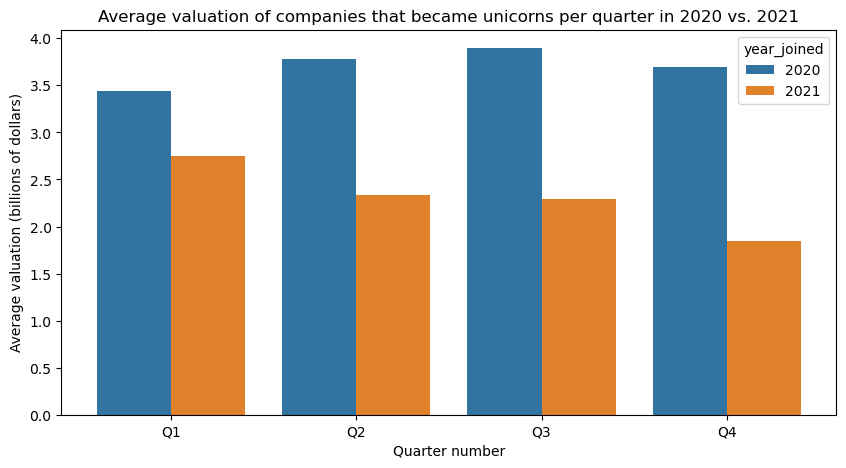

In [47]:
# Using slicing, extract the year component and the time interval that you specified, 
# and save them by adding two new columns into the subset. 
companies_by_quarter_2020_2021['quarter_number'] = companies_by_quarter_2020_2021['quarter_joined'].str[-2:]
companies_by_quarter_2020_2021['year_joined'] = companies_by_quarter_2020_2021['quarter_joined'].str[:4]

# Set the size of the plot.
plt.figure(figsize = (10, 5))

# Create a grouped bar plot.
sns.barplot(x=companies_by_quarter_2020_2021['quarter_number'],
            y=companies_by_quarter_2020_2021['Average Valuation'],
            hue=companies_by_quarter_2020_2021['year_joined'])
plt.plot()

# Set the x-axis label.
plt.xlabel("Quarter number")

# Set the y-axis label.
plt.ylabel("Average valuation (billions of dollars)")

# Set the title.
plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")

# Display the plot.
plt.show()